<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#mnist-data-로드하기" data-toc-modified-id="mnist-data-로드하기-1">mnist data 로드하기</a></span></li><li><span><a href="#mnist-data-확인하기" data-toc-modified-id="mnist-data-확인하기-2">mnist data 확인하기</a></span></li><li><span><a href="#모델-정의하기" data-toc-modified-id="모델-정의하기-3">모델 정의하기</a></span></li><li><span><a href="#모델-훈련하고-평가하기" data-toc-modified-id="모델-훈련하고-평가하기-4">모델 훈련하고 평가하기</a></span></li></ul></div>

[텐서플로 2.0 시작하기: 초보자용](https://www.tensorflow.org/tutorials/quickstart/beginner) 튜토리얼을 구현한 코드 입니다.

tensorflow 2.1을 사용 합니다.

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.1.0


## mnist data 로드하기

MNIST 데이터셋을 로드하여 준비합니다. 샘플 값을 정수에서 부동소수로 변환합니다.

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## mnist data 확인하기

In [5]:
x_train.shape    # x_train(images) 구조를 확인 합니다.

(60000, 28, 28)

In [6]:
y_train.shape    # y_train(lables) 구조를 확인 합니다.

(60000,)

In [7]:
# !pip install matplotlib
import matplotlib.pyplot as plt

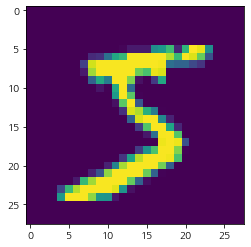

In [8]:
plt.imshow(x_train[0])

In [9]:
y_train[0]

5

## 모델 정의하기

층을 차례대로 쌓아 tf.keras.Sequential 모델을 만듭니다. 훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택합니다.

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

summary()로 모델 구조를 확인할 수 있습니다.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 모델 훈련하고 평가하기

In [12]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2990 - accuracy: 0.9141
Epoch 2/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.1459 - accuracy: 0.9571
Epoch 3/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1097 - accuracy: 0.9672
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0899 - accuracy: 0.9723
Epoch 5/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0773 - accuracy: 0.9751


In [13]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 0s - loss: 0.0794 - accuracy: 0.9757


[0.0793724676730577, 0.9757]

훈련된 이미지 분류기는 이 데이터셋에서 약 98%의 정확도를 달성합니다